<a href="https://colab.research.google.com/github/DeepakSaiPaty/Computational/blob/master/Machine_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
data=pd.read_csv('EuropeData.csv')  #Data read to dataframe
data

,Date,Number_New_Cases_Spain,Temperature_Spain,Absolute_Humidity_Spain,Relative_Humidity_Spain,Number_New_Cases_France,Temperature_France,Absolute_Humidity_France,Relative_Humidity_France,Number_New_Cases_Italy,Temperature_Italy,Absolute_Humidity_Italy,Relative_Humidity_Italy,Number_New_Cases_Germany,Temperature_Germany,Absolute_Humidity_Germany,Relative_Humidity_Germany,Number_New_Cases_UK,Temperature_UK,Absolute_Humidity_UK,Relative_Humidity_UK
0,3/1/2020,28,10.444444,7.166939,74.18,43,6.055556,6.214558,85.31,240,13.722222,9.195457,77.58,54,7.277778,5.619926,71.24,5,7.111111,5.019443,64.32
1,3/2/2020,54,10.055556,5.498560,58.33,30,6.722222,6.555864,86.16,561,13.444444,9.640647,82.74,18,6.055556,6.036812,82.87,13,6.333333,5.479149,73.86
2,3/3/2020,56,9.388889,5.900187,65.30,48,5.333333,5.342306,76.90,347,11.111111,6.883009,68.31,28,4.666667,5.842645,87.89,4,5.444444,5.330462,76.17
3,3/4/2020,75,13.611111,7.330460,62.27,34,5.777778,6.186065,86.48,466,9.333333,6.480765,71.98,39,4.388889,5.093776,78.05,11,5.333333,5.955733,85.73
4,3/5/2020,81,11.888889,6.546492,61.88,73,9.000000,8.207548,93.12,587,9.888889,6.227039,66.76,66,5.166667,5.079839,73.93,34,6.166667,6.567392,89.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,5/27/2020,510,23.055556,9.093356,44.10,276,20.944444,8.688478,47.59,397,20.000000,6.071553,35.14,362,15.888889,7.744835,57.25,4043,19.222222,9.047269,54.81
88,5/28/2020,1137,22.666667,7.445183,36.92,191,19.166667,7.961438,48.39,584,19.166667,7.815010,47.50,353,15.277778,7.439632,57.07,2013,16.555556,7.430337,52.76
89,5/29/2020,658,23.333333,7.939908,37.90,3325,19.833333,6.173384,36.08,593,16.666667,10.729687,75.68,741,14.611111,6.726599,53.74,1887,17.000000,7.371004,50.96
90,5/30/2020,664,24.888889,8.363331,36.55,597,18.888889,7.216972,44.59,516,15.666667,10.065205,75.41,738,13.777778,6.360621,53.48,2095,17.444444,8.151998,54.88


In [0]:
#Read data to individual variables for ease and changed field names for functional programming
Spain=data[['Date','Number_New_Cases_Spain','Temperature_Spain','Absolute_Humidity_Spain','Relative_Humidity_Spain']]
Spain = Spain.rename(columns={'Number_New_Cases_Spain': 'Number_New_Cases','Temperature_Spain': 'Temperature','Absolute_Humidity_Spain': 'Absolute_Humidity','Relative_Humidity_Spain': 'Relative_Humidity'})
France=data[['Date','Number_New_Cases_France','Temperature_France','Absolute_Humidity_France','Relative_Humidity_France']]
France = France.rename(columns={'Number_New_Cases_France': 'Number_New_Cases','Temperature_France': 'Temperature','Absolute_Humidity_France': 'Absolute_Humidity','Relative_Humidity_France': 'Relative_Humidity'})
Italy=data[['Date','Number_New_Cases_Italy','Temperature_Italy','Absolute_Humidity_Italy','Relative_Humidity_Italy']]
Italy = Italy.rename(columns={'Number_New_Cases_Italy': 'Number_New_Cases','Temperature_Italy': 'Temperature','Absolute_Humidity_Italy': 'Absolute_Humidity','Relative_Humidity_Italy': 'Relative_Humidity'})
Germany=data[['Date','Number_New_Cases_Germany','Temperature_Germany','Absolute_Humidity_Germany','Relative_Humidity_Germany']]
Germany = Germany.rename(columns={'Number_New_Cases_Germany': 'Number_New_Cases','Temperature_Germany': 'Temperature','Absolute_Humidity_Germany': 'Absolute_Humidity','Relative_Humidity_Germany': 'Relative_Humidity'})
UK=data[['Date','Number_New_Cases_UK','Temperature_UK','Absolute_Humidity_UK','Relative_Humidity_UK']]
UK = UK.rename(columns={'Number_New_Cases_UK': 'Number_New_Cases','Temperature_UK': 'Temperature','Absolute_Humidity_UK': 'Absolute_Humidity','Relative_Humidity_UK': 'Relative_Humidity'})

In [0]:
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression    #imported model from the library
from sklearn import metrics
import numpy as np
def model_prediction(frame):
  X=frame[['Temperature','Absolute_Humidity','Relative_Humidity']]    #Dependent variables considered
  y=frame[['Number_New_Cases']]     #Target variables considered
  regressor = LogisticRegression()  #Called model
  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=0)  #Splitted data 20 for test and  80 for train
  regressor.fit(X_train,y_train)  #Fitting train data to model
  y_pred = regressor.predict(X_test)   #Prediciting the values for dependent variables
  y_pred=pd.DataFrame(y_pred,index=y_test.index,columns=['Predicted_New_Cases']) #converting to dataframe
  df=pd.concat([y_pred,y_test],axis=1)  #Concatenation of prediction and actual fields
def visualization(vframe):    
  df=model_prediction(vframe)      #Called model defined function
  print(df)    
  df.plot(kind='bar',figsize=(14,6))   #Visualized the results
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
  plt.show()

Prediction values could have been better if there are more number of rows in the dataset.


----------------------------------------------SPAIN---------------------------------------------
    Predicted_New_Cases  Number_New_Cases
2                  7413                56
33                 8954              7272
22                 5446              4646
16                 4537              2503
13                  482              1683
24                 7691              8553
60                 1387              1241
76                 1387               515
80                  466               518
68                  482              1173
45                 5209              4424
7                  7583               330
26                 1706              9181
79                  466               431
42                  482              3899
63                  482               935
8                  6424               433
87                  466               510
51                 4537              2951


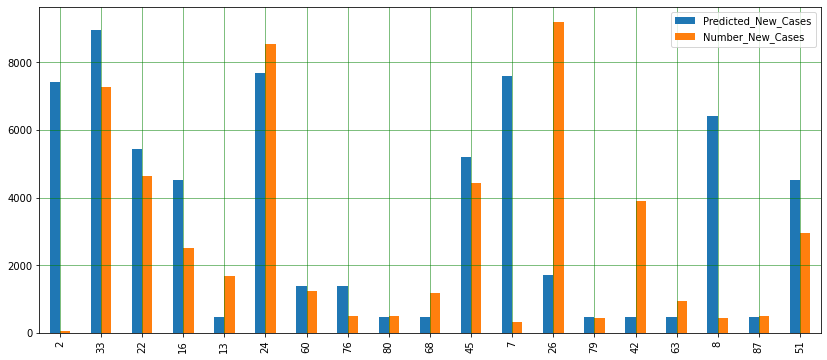


----------------------------------------------France--------------------------------------------
    Predicted_New_Cases  Number_New_Cases
2                    34                48
33                  838              2116
22                 7578              1559
16                 1065              1210
13                   73               785
24                 2931              2446
60                  286              1607
76                 1537               563
80                  318               524
68                 1653               629
45                 4267              5497
7                    73               103
26                 2673              3922
79                 1653               492
42                 4286              3114
63                  372               794
8                    73               410
87                  418               276
51                 4183              2051


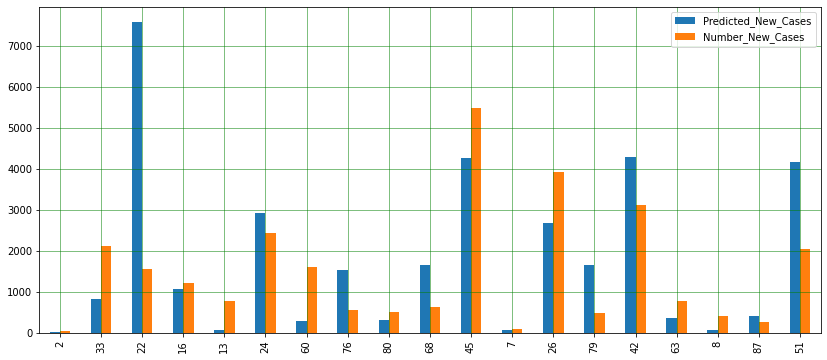


----------------------------------------------Italy---------------------------------------------
    Predicted_New_Cases  Number_New_Cases
2                   587               347
33                  466              4668
22                 4053              5560
16                  778              4000
13                 2651              2547
24                 4789              5249
60                 3370              2086
76                  888               789
80                 1075               813
68                 1327              1401
45                 4585              2972
7                  4053              1247
26                 2651              6153
79                  675               451
42                 3021              4694
63                 1075              1900
8                   466              1492
87                  642               397
51                 3047              2256


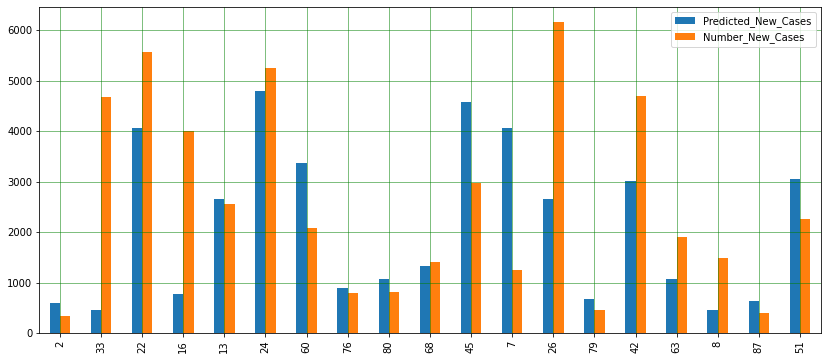


----------------------------------------------Germany-------------------------------------------
    Predicted_New_Cases  Number_New_Cases
2                   138                28
33                  933              6174
22                 4751              3311
16                  933              1174
13                  284               693
24                  933              2342
60                  431              1478
76                 1144               620
80                 1144               797
68                 1144              1209
45                  933              2486
7                   138               163
26                 2458              5780
79                  638               513
42                 1144              2821
63                  289               793
8                   357                55
87                 1144               362
51                 1144              1785


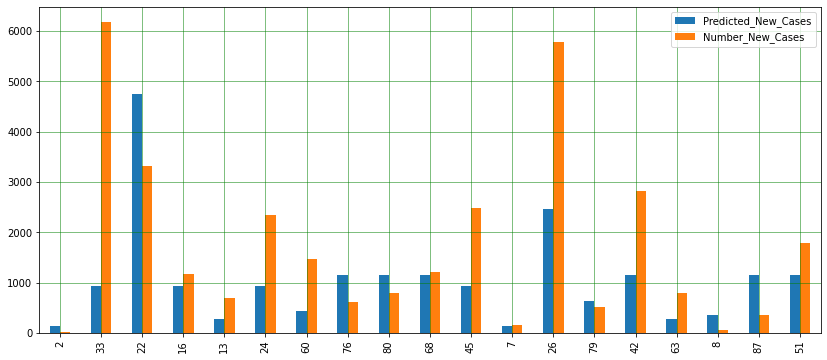


------------------------------------------------UK-----------------------------------------------
    Predicted_New_Cases  Number_New_Cases
2                    11                 4
33                 4450              4244
22                 2885               665
16                   48               152
13                   48               117
24                 1452              1427
60                   48              4076
76                 4301              3560
80                 2006              2412
68                 2405              5514
45                 3985              5252
7                    48                43
26                   83              2129
79                 2405              2711
42                 4649              8719
63                 4339              4806
8                    48                67
87                 1625              4043
51                 3735              4676


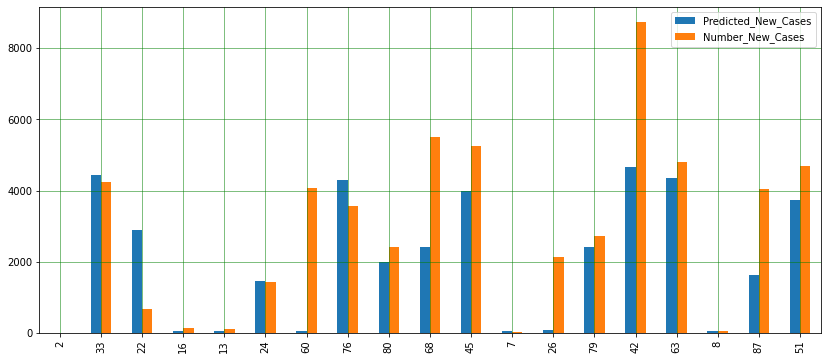

In [0]:
print('\n----------------------------------------------SPAIN---------------------------------------------')
visualization(Spain)
print('\n----------------------------------------------France--------------------------------------------')
visualization(France)
print('\n----------------------------------------------Italy---------------------------------------------')
visualization(Italy)
print('\n----------------------------------------------Germany-------------------------------------------')
visualization(Germany)
print('\n------------------------------------------------UK-----------------------------------------------')
visualization(UK)